# RE:从零开始的多层感知机

## 隐藏层

### 使用的原因：

   当模型通过仿射变换将输入映射到输出时，认为这种仿射变换是线性的其实是一种**强假设**
因为线性意味着单调假设，虽然在实际中有很多问题我们都可以通过对数据的**预处理**使线性变得合理，但是，在图像处理环节中，单一的线性化处理便很不合理（例如在猫狗图像分别中，认为猫狗的区别与某一像素的强弱有单调关系）。而出现这一矛盾的要点在于**上下文**，因此引入隐藏层，来扩展线性模型。

### 如何在网络中加入隐藏层

![多层感知机](https://picx.zhimg.com/v2-b88008e27a901faa50b408e0d5749f49_r.jpg "加入隐藏层")

### 从线性到非线性

设$ X \in R^{n*d} $   (n个样本的小批量)

$d$   :输入特征

设 $ H \in R^{n*h} $ (h个隐藏单元的单隐藏层多层感知机的隐藏层的输出，**隐藏表示**)

$H$ 称为隐藏层变量/隐藏变量

因为隐藏层与输出层全连接，故有：

隐藏层权重： $W^{(1)} \in R^{d*h}$

隐藏层偏置：$b^{(1)} \in R^{1*h}$

输出层权重： $W^{(2)} \in R^{h*q}$

输出层偏置： $b^{(2)} \in R^{1*q}$

单隐藏层多层感知机的输出： $O \in R^{n*q} $

故可得等式：

$ H = XW^{(1)} + b^{(1)} $

$ O =HW^{(2)} + b^{(2)} $

注意此时隐藏层的添加其实并没有意义，和添加前等价：

设 $W = W^{(1)}W^{(2)}$ 和 $b = b^{(1)}W^{(2)}+b^{(2)}$

$ O = (XW^{(1)} + b^{(1)})W^{(2)} + b^{(2)} = XW^{(1)}W^{(2)} + b^{(1)}W^{(2)} + b^{(2)} = XW +b $

由此我们引入了**激活函数** （$ \sigma $）这一非线性的结构，通过让在仿射变换后对每个隐藏层单元应用，以发挥多层架构的潜力。

我们称激活函数的输出$  \sigma  ()$ 为激活值。

$ H = \sigma (XW^{(1)} + b^{(1)} ) $

$ O = HW^{(2)} + b^{(2)} $

这样我们便可以保证我们的多层感知机不会退化成线性模型

### 通用近似定理

理论上，给定足够的神经元以及正确的权重，我们即使只有一个隐藏层，我们也可以对任意函数建模。但实际上，我们所追求的是设计出符合规范的程序。

## 激活函数

In [6]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

$ ReLU(x) = max(x,0) $

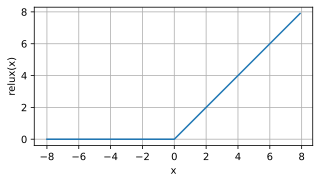

In [8]:
x= torch.arange(-8.0,8.0,0.1,requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relux(x)',figsize=(5,2.5))

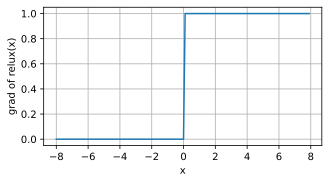

In [10]:
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of relux(x)',figsize=(5,2.5))

relu函数具有许多变体

### sigmoid函数

$ sigmoid(x) = \frac{ 1}{1+exp(-x)} $

有时被称为积压函数

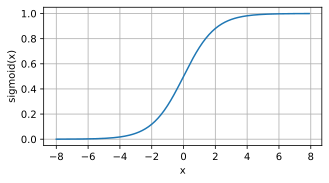

In [11]:
y=torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize=(5,2.5))

sigmoid函数的导数：

$ \frac{d}{dx} sigmoid(x) = \frac{exp(-x)}{(1+exp(-x))^2} = sigmoid(x)(1-sigmoid(x)) $

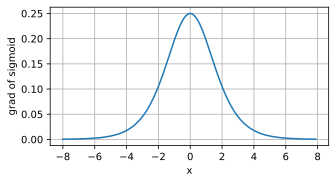

In [12]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize=(5,2.5))

### Tanh函数

$ tanh(x) = \frac{1-exp(-2x)}{1+exp(2x)} $

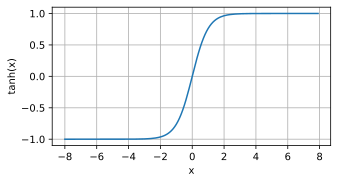

In [14]:
y=torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize=(5,2.5))

tanh函数的导数是：

$ \frac{d}{dx}tanh(x) = 1 - tanh^{2}(x) $

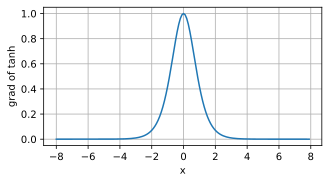

In [15]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize=(5,2.5))

## 多层感知机的从零开始实现

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

In [17]:
batch_size = 256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

In [18]:
num_inputs,num_outputs,num_hiddens = 784,10,256

W1 = nn.Parameter(torch.randn(
    num_inputs,num_hiddens,requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens,num_outputs,requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1,b1,W2,b2]

### 激活函数

In [19]:
def relux(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

### 模型

In [26]:
def net(X):
    X=X.reshape(-1,num_inputs)
    H = relux(X@W1+b1)
    return (H@W2+b2)

### 损失函数

In [27]:
loss = nn.CrossEntropyLoss(reduction='none')

### 训练

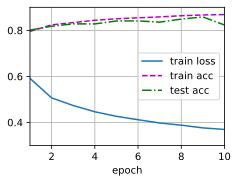

In [31]:
num_epochs,lr=10,0.1
updater = torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

学习率过低的情况：

AssertionError: 0.5678887695948283

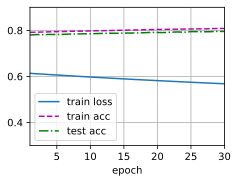

In [30]:
num_epochs,lr=30,0.001
updater = torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

### 预测

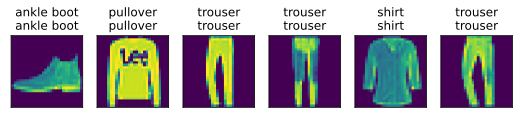

In [32]:
d2l.predict_ch3(net,test_iter)

## 简洁实现

In [33]:
import torch
from torch import nn
from d2l import torch as d2l

In [34]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights);

In [35]:
batch_size,lr,num_epochs = 256,0.1,10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(),lr=lr)

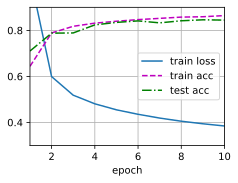

In [36]:
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 模型选择、欠拟合and过拟合

过拟合是指模型在训练数据上拟合的比在潜在分布中更接近的现象，用来对抗过拟合的手段称为**正则化**

### 训练误差与泛化误差

#### 训练误差

模型在训练数据集上计算得到的误差

#### 泛化误差

模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

### 统计学习理论

GC律：一维经验分布能完美逼近真实分布，且收敛极快（指数速率）。

VC律：这种逼近能否推广到复杂函数类，取决于该类的内在复杂度（VC维）

### 模型复杂度

可调节参数的数量：当可调节的参数的数量很大时（或称自由度），模型往往容易过拟合

参数的取值：当权重取值范围较大时，模型可能更容易过拟合

训练样本的数量：即使模型很简单，也很容易过拟合只包含一两个样本的数据集。

### 模型选择

#### 验证集

#### K折交叉验证

将原始训练数据分成K个不重叠的子集；然后执行K次模型训练和验证，每次在K-1个子集上进行训练，并在剩余的一个子集上进行验证，以此通过K次实验的结果取平均值来估计训练结果以及验证误差

### 欠拟合or过拟合

#### 模型复杂度

例子：给定单个特征 $x$ 和对应实际标签 $y$  组成的训练数据，我们试图找到$ d$ 阶多项式如下，来估计标签

 $$\hat{y}=\sum_{i=0}^{d} x^iw_i$$

其中特征是$x^i$给出的，模型权重是$w_i$给出的，偏置是$W_0$给出的

而对于该线性回归问题，我们使用平方误差作为损失函数

![多层感知机](https://pica.zhimg.com/v2-c77e05a19c4079ce9852ba0f73ea6dda_1440w.jpg "模型复杂度对欠拟合和过拟合的影响")

#### 数据集大小

### 多项式回归以验证概念

In [3]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### 生产数据集

对于给定的$x$,我们将使用以下三阶多项式来生成训练数据和测试数据的标签：

$ y =5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+\epsilon$,其中$\epsilon \sim \mathcal{N}(0, \sigma^2), \quad \sigma = 0.1 $

将$x^i$变为$\frac{x^i}{i!}$的原因是避免非常大的梯度或损失值

In [5]:
max_degree = 20
n_train,n_test=100,100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5,1.2,-3.4,5.6])
features = np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
poly_features = np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:,i]/=math.gamma(i+1)
labels = np.dot(poly_features,true_w)
labels+=np.random.normal(scale=0.1,size=labels.shape)

In [6]:
true_w,features,poly_features,labels = [torch.tensor(x,dtype=torch.float32)for x in [true_w,features,poly_features,labels]]

#### 对模型进行训练

In [12]:
def evaluate_loss(net,data_iter,loss):  #@save
    metric =d2l.Accumulator(2)
    for X,y in data_iter:
        out=net(X)
        y=y.reshape(out.shape)
        l=loss(out,y)
        metric.add(l.sum(),l.numel())
    return metric[0]/metric[1]

In [13]:
def train(train_features,test_features,train_labels,test_labels,num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape,1,bias=False))
    batch_size = min(10,train_labels.shape[0])
    train_iter = d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size)
    test_iter = d2l.load_array((test_features,test_labels.reshape(-1,1)),batch_size,is_train=False)
    trainer = torch.optim.SGD(net.parameters(),lr=0.01)
    animator = d2l.Animator(xlabel='epoch',ylabel='loss',yscale='log',xlim=[1,num_epochs],ylim=[1e-3,1e2],legend=['train','test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net,train_iter,loss,trainer)
        if epoch == 0 or (epoch+1)%20 ==0:
            animator.add(epoch+1,(evaluate_loss(net,train_iter,loss),evaluate_loss(net,test_iter,loss)))
    print('weight:',net[0].weight.data.numpy())

#### 三阶多项式函数拟合（正常训练）

weight: [[ 5.016706   1.2076055 -3.4182243  5.5711117]]


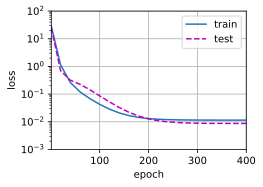

In [14]:
train(poly_features[:n_train,:4],poly_features[n_train:,:4],labels[:n_train],labels[n_train:])

#### 线性函数拟合（欠拟合）

weight: [[3.2263894 4.41016  ]]


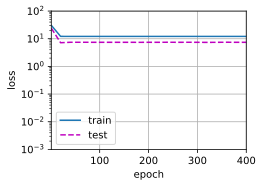

In [16]:
train(poly_features[:n_train,:2],poly_features[n_train:,:2],labels[:n_train],labels[n_train:])

#### 高阶多项式函数拟合（过拟合）

weight: [[ 4.9499063   1.3789079  -3.1272051   4.8359284  -0.71196043  1.504754
  -0.01524701  0.22050627  0.06898034 -0.06192927 -0.1843641   0.11367342
   0.09403624  0.02675985 -0.20018321  0.20005365  0.10909981  0.05754928
  -0.10610112  0.05531117]]


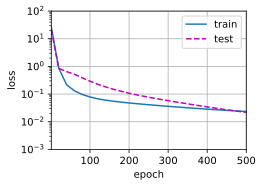

In [20]:
train(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:],num_epochs=500)

## 权重衰减

在上文中，我们通过调整多项式项数的方式来调节拟合情况，但实际中，随着阶数$d$的升高，带有阶数$d$的项数也会随之激增。因此会导致即使阶数上微小的调整，也会显著的改变模型的复杂度。因此我们需要颗粒度更细小的工具。

### 范数与权重衰减

在机器学习中，我们通常采用$L_2$正则化的手段

举个例子，在线性回归问题中，我们的损失函数为：

$$ L(w,b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2}(w^Tx^{(i)}+b-y^{(i)})^2 $$

在加入$L2$正则化后变为

$$ L(w,b)+\frac{\lambda}{2}||w||^2 $$

其中$\lambda$，为非负超参数

此时，$L2$正则化回归的小批量随机梯度下降变为：

$$w\leftarrow(1-\eta\lambda)w-\frac{\eta}{|B|}\sum_{i\in B}x^{(i)}(w^Tx^{(i)}+b-y^{(i)}) $$

##### 为何使用$L2$而非$L1$？

$L2$正则化线性模型构成的为经典的**岭回归**

$L1$正则化线性回归称为套索回归，它会使模型将权重集中在一小部分特征上，并使其他权重清除为零，又称之为**特征选择**

### 高维线性回归

In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

依旧生成一些数据：

$$ y =0.05 + \sum_{i=1}^{d}0.01x_i + \epsilon,其中\epsilon \sim \mathcal{N}(0, \sigma^2), \quad \sigma = 0.01$$

In [3]:
n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones((num_inputs,1))*0.01,0.05
train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)
test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)

### 从零开始的高维线性回归

#### 初始化模型参数

In [4]:
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]

#### 定义$L_2$范数惩罚

In [6]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

#### 定义训练代码实现 

In [7]:
def train(lambd):
    w,b = init_params()
    net,loss = lambda X : d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs,lr = 100,0.003
    animator = d2l.Animator(xlabel = 'epochs',ylabel = 'loss',yscale='log',xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y) + lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
        if (epoch + 1) % 5 ==0:
            animator.add(epoch +1 ,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
    print('w的L2范数为:',torch.norm(w).item())

#### 忽略正则化直接训练

w的L2范数为: 14.105093002319336


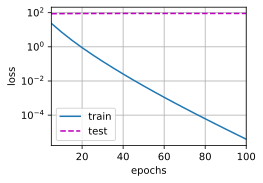

In [8]:
train(lambd=0)

#### 使用权重衰减

w的L2范数为: 0.3554324805736542


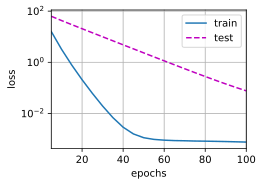

In [9]:
train(lambd=3)

### 简洁实现

In [10]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs,lr=100,0.003
    trainer = torch.optim.SGD([
    {"params":net[0].weight,'weight_decay':wd},
    {"params":net[0].bias}],lr=lr)
    animator = d2l.Animator(xlabel = 'epochs',ylabel='loss',yscale = 'log',xlim = [5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.mean().backward()
            trainer.step()
        if(epoch+1)%5 == 0:
            animator.add(epoch +1,
                         (d2l.evaluate_loss(net,train_iter,loss),
                          d2l.evaluate_loss(net,test_iter,loss)))
    print('w的l2范数：',net[0].weight.norm().item())

w的l2范数： 14.287781715393066


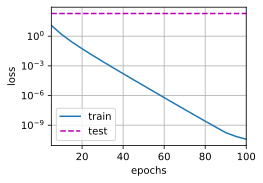

In [11]:
train_concise(0)

w的l2范数： 0.520107626914978


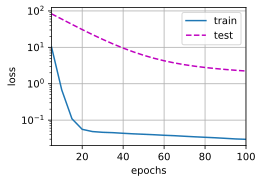

In [12]:
train_concise(3)

## 暂退法

### 重新审视过拟合

当面对更多的特征而样本不足时，线性模型往往会过拟合。相反，当给出更多样本而不是特征时，通常线性模型不会过拟合。然而线性模型的稳定是基于舍弃灵活性而得到的。

泛化性和灵活性之间的这种基本权衡被描述为**偏差-方差权衡**。

### 扰动的稳健性

首先，一个好模型的标准是什么？

1.简单性：即应该以简单的模型为目标

2.平滑线：即函数不应该对其输入的微小变化敏感。（Christopher Bishop 证明了具有输入噪声的训练等价于吉洪诺夫正则化，即“要求函数平滑”与“要求函数对输入的随机噪音要有适应性”。）

基于这种观点，暂退法诞生。它的思想便是：

在计算后续层之前向网络的每一层注入噪音。对于如何注入这种噪音，有一种做法是**无偏**的方式注入。如：将$\epsilon \sim \mathcal{N}(0, \sigma^2)$中抽取噪音添加进输入$x$中，从而产生扰动点$x'=x + \epsilon$，而期望为$E[x']=x$

而在标准暂退法正则化中，激活值$h$以暂退概率$p$被随机变量$h'$替换，即：

$$
h' = 
\begin{cases} 
0, &  概率为p \\
\frac{h}{1-p}, & 其他情况 
\end{cases}
$$

且此时期望不变，即$E[h']=h$

### 实践中的暂退法

![暂退法后的多层感知机](https://zh.d2l.ai/_images/dropout2.svg "暂退法后的多层感知机")

### RE:从零开始的暂退法

In [13]:
import torch
from torch import nn
from d2l import torch as d2l

我们从均匀分布$U[0,1]$中抽取样本，只保留对应样本大于$p$的节点

In [14]:
def dropout_layer(X,dropout):
    assert 0<= dropout <=1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout ==0:
        return X
    mask = (torch.rand(X.shape)>dropout).float()
    return mask*X/(1.0 - dropout)

#### 定义模型参数

In [15]:
num_inputs,num_outputs,num_hiddens1,num_hiddens2 = 784,10,256,256

#### 定义模型

In [16]:
dropout1,dropout2 = 0.2,0.5

class Net(nn.Module):
    def __init__(self,num_inputs,num_outputs,num_hiddens1,num_hiddens2,is_training=True):
        super(Net,self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs,num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1,num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2,num_outputs)
        self.relu = nn.ReLU()

    def forward(self,X):
        H1 = self.relu(self.lin1(X.reshape((-1,self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1,dropout1)
        H2=self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2,dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs,num_outputs,num_hiddens1,num_hiddens2)

#### 训练和测试

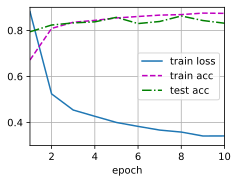

In [17]:
num_epochs,lr,batch_size = 10,0.5,256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

### 简洁实现

In [18]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256,256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256,10))

In [19]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights);

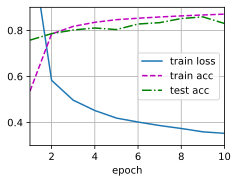

In [20]:
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 前向传播、反向传播和计算图

### 前向传播

指的是：按顺序计算和储存神经网络中每层的结果

设输入样本为$x \in R^d$,并且隐藏层不包含偏置项，则中间变量为：

$$z = W^{(1)}x$$

其中，$W^{(1)} \in R^{h \times d}$ 是隐藏层的权重参数。而中间变量$z \in R^h $通过激活函数$\phi$后，我们得到长度为$h$的隐藏层激活向量

$$ h = \phi(z) $$

若设输出层的参数只有权重 $W^{(2)} \in R^{q \times h}$,则我们得到长度为$q$的输出层变量：

$$ o = W^{(2)}h$$

设损失函数为$l$,样本标签为$y$,则单个数据样本的损失项：

$$L =l(o,y) $$

根据$L_2$正则化的定义，给定超参数$\lambda$,正则化项为：

$$s = \frac{\lambda}{2}(||W^{(1)}||_F^2 + ||W^{(2)}||^2_F)$$

最后，模型在给定数据样本上的正则化损失为：

$$J = L + s$$

### 前向传播计算图

![image](https://pic4.zhimg.com/v2-390153056cd9c70b64b12d4a88865607_1440w.jpg)

### 反向传播

指的是计算机神经网络参数梯度的方法，该方法根据微积分中的链式法则，按相反的顺序从输出层到输入层遍历网络。

假设有函数$Y = \mathcal{f}(X)$和$Z = g(Y)$,其中输入和输出$X$,$Y$,$Z$是任意形状的张量。应用链式法则，我们可以计算$Z$关于$X$的导数：

$$\frac{\partial Z}{ \partial X } = prod(\frac{\partial Z }{ \partial Y },\frac{\partial Y }{ \partial X })$$

这里的$prod$代指矩阵运算等所有的必要的运算

反向传播的目标是计算梯度$\frac{\partial J}{ \partial W^{(1)} }$ 和 $\frac{\partial J}{ \partial W^{(2)} }$,因此我们从计算图的结果开始反向计算

第一步，计算目标函数$J=L+s$关于损失项$L$和正则化项$s$的梯度：

$$\frac{\partial J}{ \partial L } = 1,\frac{\partial J}{ \partial s } = 1$$

第二步，计算输出层变量$o$的梯度：

$$\frac{\partial J }{ \partial o } = prod(\frac{\partial J }{ \partial L },\frac{\partial L }{ \partial o }) = \frac{\partial L }{ \partial o } \in R^q$$

第三步，计算正则化项关于两个参数的梯度：

$$\frac{\partial s }{ \partial W^{(1)} } = \lambda W^{(1)} , \frac{\partial s }{ \partial W^{(2)} } = \lambda W^{(2)}$$

现在，计算最接近输出层的模型参数的梯度$\frac{\partial J }{ \partial W^{(2)} } \in R^{q \times h}$。应用链式法则得出

$$ \frac{\partial J }{ \partial W^{(2)} } = prod(\frac{\partial J }{ \partial o },\frac{\partial o }{ \partial W^{(2)} })+prod(\frac{\partial J }{ \partial s },\frac{\partial s }{ \partial W^{(2)} }) = \frac{\partial J }{ \partial o }h^\top + \lambda W^{(2)} $$

为了获得关于$W^{(1)}$的梯度，关于隐藏层输出的梯度$\frac{\partial J }{ \partial h } \in R^h$由下式给出：

$$ \frac{\partial J }{ \partial h } = prod( \frac{\partial J }{ \partial o }, \frac{\partial o }{ \partial h }) = W^{(2)\top} \frac{\partial J }{ \partial o } $$$$$$

因此计算$ \frac{\partial J }{ \partial z } \in R^h$,我们用$\odot$来表示元素乘法的运算符：

$$\frac{\partial J }{ \partial z } = prod(\frac{\partial J }{ \partial h },\frac{\partial h }{ \partial z })=\frac{\partial J }{ \partial h }\odot \phi'(z)$$

最后，我们便可以计算$\frac{\partial J }{ \partial W^{(1)} } \in R^{h \times d}$：

$$\frac{\partial J }{ \partial W^{(1)} } = prod(\frac{\partial J }{ \partial z },\frac{\partial z }{ \partial W^{(1)} }) + prod(\frac{\partial J }{ \partial s },\frac{\partial s }{ \partial W^{(1)} }) = \frac{\partial J }{ \partial z }x^\top + \lambda W^{(1)} $$

## 数值稳定性和模型初始化

### 梯度消失和梯度爆炸

具有$L$层、输入$x$和输出$o$的深层网络，每一层$l$由变换$\mathcal{f}_1$定义，该变换的参数为权重$W^{(l)}$,其隐藏变量是$h^{(l)}$(令$h^{(0)}=x$)，则这个网络表示为：

$$ h^{(l)} = f_1(h^{(l-1)}), \quad \text{因此} \quad o = f_l \circ \cdots \circ f_1(x) $$

如果所有隐藏变量和输入都是向量，我们可以将$o$关于任何一组参数$W^{(l)}$的梯度写为：

$$ \partial_{W^{(l)}}o = \underbrace{
\partial_{h^{(L-1)}}h^{(L)}
}_{M^{(L)}\stackrel{\text{def}}{=}} \cdots \underbrace{
\partial_{h^{(l)}} h^{(l+1)}
}_{M^{(l+1)}\stackrel{\text{def}}{=}}\underbrace{
\partial_{W^{(l)}}h^{(l)}
}_{v^{(l)}\stackrel{\text{def}}{=}}$$



换言之，该梯度是$L-1$个矩阵$M^{(L)}\cdots M^{(l+1)} $与梯度向量$v^{(l)}$的乘积，因此我们很容易受到数值下溢问题的影响。所以面临这梯度爆炸或者梯度消失的问题

#### 梯度消失

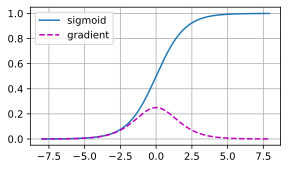

In [21]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0,8.0,0.1,requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(),[y.detach().numpy(),x.grad.numpy()],legend=['sigmoid','gradient'],figsize=(4.5,2.5))

sigmoid 函数在输入很大或很小时，它的梯度会消失。

#### 梯度爆炸

In [23]:
M = torch.normal(0,1,size=(4,4))
M

tensor([[-0.4039, -0.6401,  2.2503,  0.9766],
        [-0.9920,  1.3947,  0.1947, -0.5412],
        [ 0.5534,  0.7801, -0.3378, -0.3769],
        [-0.1787,  0.0929,  1.1534,  0.5354]])

In [24]:
for i in range(100):
    M = torch.mm(M,torch.normal(0,1,size=(4,4)))
M

tensor([[-1.5040e+27,  5.4446e+26,  1.5114e+27,  2.5649e+27],
        [ 1.8573e+27, -6.7239e+26, -1.8666e+27, -3.1675e+27],
        [ 8.7383e+26, -3.1634e+26, -8.7818e+26, -1.4902e+27],
        [-3.5343e+26,  1.2795e+26,  3.5519e+26,  6.0274e+26]])

### 打破对称性

### 参数初始化

#### Xavier初始化

对于没有非线性的全连接层输出$o_i$的分布，该层$n_{in}$输入$x_j$及其相关权重$W_ij$，输出由下式给出：

$$o_i = \sum_{j=1}^{n_in}W_{ij}x_{j}$$

现在，我们假设层$x_j$的输入也具有均值0和方差$\gamma^2$，我们可以用以下方式计算$o_i$的均值和方差：

\begin{align}
E[o_i] &= \sum_{j=1}^{n_{\text{in}}} E[W_{ij}x_j] \nonumber \\
       &= \sum_{j=1}^{n_{\text{in}}} E[W_{ij}] E[x_j] \nonumber \\
       &= 0
\end{align}

$$\begin{align}
Var[o_i] &= E[o_i^2]-(E[o_i])^2 \nonumber \\
       &= \sum_{j=1}^{n_{\text{in}}} E[W_{ij}^2 x_j^2] - 0 \nonumber \\
       &= \sum_{j=1}^{n_{\text{in}}}E[W^2_{ij}]E[x_j^2] \nonumber \\
       &= n_{\text{in}}\sigma^2\gamma^2
\end{align}$$

而保持方差不变的一种方式是设置$n_{\text{in}}\sigma^2=1$，但是当我们考虑反向转播时，会发现，除非$n_{\text{out}}\sigma^2=1$否则梯度的方差可能会增大

我们当然无法同时满足这两个条件，所以我们退而求其次，我们选择满足：

$$ \frac{1}{2}(n_{\text{in}}+n_{\text{out}})\sigma^2 = 1 \text{或等价于} \sigma = \sqrt{\frac{2}{n_{\text{in}}+n_{\text{out}}}}$$

这便是Xavier初始化的基础

从均值为0，方差$\sigma^2 = 2/(n_{in}+n_{out})$的高斯分布中抽样权重

也可以等价为：

$$U(-\sqrt{\frac{6}{n_{\text{in}}+n_{\text{out}}}},\sqrt{\frac{6}{n_{\text{in}}+n_{\text{out}}}})$$

## 环境和分布偏移

设一个模型，训练数据为：${(x_1,y_1),\cdots ,(x_n,y_n)}$的特征和相关的标签，经过迭代，在每个小批量之后更新模型$f$的参数,这里我们不考虑正则化以极小化训练损失：

$$ 
\underset{f}{\text{minimize}} 
\frac{1}{n}\sum_{i=1}^{n} l(f(x_i), y_i)
$$

其中，$l$是损失函数，用来度量：给定标签$y_i$,预测$f(x_i)$的“糟糕程度”,也称之为**经验风险**，它是为了近似**真实风险**，而整个训练数据上的平均损失，即从其真实分布$p(x,y)$中抽样的所有数据的总体损失的期望：

$$ E_{p(x,y)}[l(f(x),y)] = \int\int l(f(x),y)p(x,y)dxdy$$

然而在实践中，我们通常无法获得总体数据。因此，经验风险最小化较为常用。

### 协变量偏移

假设对于带标签的数据$(x_i,y_i)$,我们要评估$P(y|x)$。然而观测值$x_i$是从某些源分布$q(x)$中得出的，而不是从目标分布$p(x)$得出的。但是，依赖性假设意味着条件分布保持不变，即$p(y|x)=q(y|x)$。因此，我们可以用下面的恒等式来纠正：

$$\int \int l(f(x),y)p(y|x)p(x)dxdy = \int \int l(f(x),y)q(y|x)q(x)\frac{p(x)}{q(x)}dxdy $$

换言之，我们需要根据数据来自正确分布与来自错误分布的概率之比，来重新衡量每个数据样本的权重：

$$\beta_i \stackrel{\text{def}}{=} \frac{p(x_i)}{q(x_i)} $$

将权重$\beta_i$代入每个数据样本$(x_i,y_i)$中，我们可以使用“加权经验风险最小化”来训练模型：

$$ 
\underset{f}{\text{minimize}} 
\frac{1}{n}\sum_{i=1}^{n}\beta_i l(f(x_i), y_i)
$$

而$\beta_i$这个比率，我们需要估计它。方法有很多，我们这里讲解逻辑斯谛回归：

思路便是：学习一个分类器，让它分类从$p(x)$中抽取的数据和从$q(x)$中抽取的数据，若无法区分，则说明可能来自这两个的任何一个，反之，便要相应的增加或减少权重

假设我们分别从$p(x)$和$q(x)$这两个分布中抽取相同数量的样本。现在用$z$标签表示，从$p$抽取的数据为1，从$q$抽取的数据为-1.则混合数据集中的概率为：

$$ P(z=1|x)=\frac{p(x)}{p(x)+q(x)} \text{且由此，} \frac{P(z=1|x)}{P(z=-1|x)}=\frac{p(x)}{q(x)}$$

由于我们使用逻辑斯谛回归，于是，$P(z=1|x)=\frac{1}{(1+exp(-h(x)))}$(h是一个参数化函数)，于是：

$$
\beta_i = \frac{\sigma(h(x_i))}{\sigma(-h(x_i))} 
        = \frac{\sigma(h(x_i))}{1 - \sigma(h(x_i))} 
        = \exp(h(x_i))
$$
$$
\text{其中 } \sigma(z) = \frac{1}{1 + \exp(-z)} \text{ 为 sigmoid 函数}
$$

因此，我们需要解决两个问题：第一个问题是关于区分来自两个分布的数据；第二个问题是关于加权经验风险的最小化。

综上，我们来总结一下完整的协变量偏移纠正算法：

假设我们有一个训练集${(x_1,y_1),\cdots , (x_n,y_n)}$和一个未标注的测试集${u_1,\cdots , u_n}$。对于协变量偏移，我们假设$x_i(1≤i≤n)$来自某个源分布，$u_i$来自目标分布，以下是纠正协变量偏移的经典算法：

- (1)生成一个二元分类训练集：${(x_1,-1),\cdots,(x_n,-1),(u_1,1),\cdots,(u_n,1)}$
- (2)用逻辑斯谛回归训练二元分类器得到函数$h$
- (3)使用$\beta_i = exp(h(x_i))$或更好的$\beta_i = min(exp(h(x_i)),c)\text{(c为常量)}$对训练数据进行加权
- (4)使用权重$\beta_i$进行$\underset{f}{\text{minimize}} 
\frac{1}{n}\sum_{i=1}^{n}\beta_i l(f(x_i), y_i)$中的${(x_1,y_1),\cdots,(x_n,y_n)}$的训练

当然，上述算法的一个重要前提便是：目标分布中的每一个数据样本在训练时出现的概率为非零

### 标签偏移

假设我们处理的是$k$个类别的分类任务，假设标签的分布随时间变化，即$q(y)≠p(y)$但类别条件分布保持不变，$q(x|y)=p(x|y)$。若源分布$q(y)$是错误的，我们可以根据以下恒等式来纠正：

$$ \iint  l(f(x),y)p(x|y)p(y)dxdy = \iint l(f(x),y)q(x|y)q(y)\frac{p(y)}{q(y)}dxdy $$

这里，重要性权重将对应于标签似然比率

$$\beta_i \stackrel{\text{def}}{=} \frac{p(y_i)}{q(y_i)} $$

为了估计目标标签分布，我们首先采用性能相当好的已有的分类器（通常基于训练数据进行训练），并使用验证集（也来自训练分布）计算其混淆矩阵。混淆矩阵$C$是一个$k \times k$矩阵，其中每列对应于标签类别，每行对应于模型的预测类别。每个元素的值$c_{ij}$是验证集中真实标签为$j$而我们的模型预测为$i$的样本数的占比

因为我们不能直接计算目标数据上的混淆矩阵，所以我们只能将模型在测试时的预测取平均值，得到平均模型输出$\mu(\hat{y}) \in \mathbb{R}^k$，其中第$i$个元素$\mu(\hat{y_i})$是模型预测测试集中$i$的总预测分数

如果我们的分类器一开始就相当精准并且目标数据只包含我们以前见过的类别，以及标签偏移假设成立，我们便可以通过一个线性模型来解决：

$$ Cp(y)=\mu(\hat{y}) $$

作为一个估计，$\sum_{j=1}^{k}c_{ij}p(y_j)=\mu(\hat{y_i})$,对所以$i (1≤i≤k)$成立。其中$p(y_j)$是$k$维标签分布向量$p(y)$的第$j$个元素

所以，$$p(y)=C^{-1}\mu(\hat{y})$$

### 概念偏移

通过更新数据集来纠正